# task4

C(x=0) = 1

dC/dt(x=-1) = 0

compute C with implicit scheme of 2nd order (something like crank-nicholson) and apply BCs

task: analyse accuracy + compare with task 3

In [61]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from task1_hickel import analytical_sol

In [66]:
#thomas algorithm
def TDMAsolve(A, b):
    Ac = A.copy()
    bc = b.copy()
    n = A.shape[0]
    x = numpy.zeros(n)

    #eliminate lower diagonal
    for k in range(1, n):
        m = Ac[k,k-1]/Ac[k-1,k-1]
        Ac[k,k] = Ac[k,k] - m*Ac[k-1,k]
        bc[k] = bc[k] - m*bc[k-1]
        #Ac[k,k-1] = 0 #not necessary

    #reverse substitution
    x[n-1] = bc[n-1]/Ac[n-1,n-1]
    k=n-2
    for i in range(0, n-1):
        x[k] = (bc[k]-Ac[k,k+1]*x[k+1])/Ac[k,k]
        k=k-1

    return x


#fill discretisation matrix
def fill_matrix(matrix):
    for i in range(len(matrix[0])):
        matrix[i,i] = 1+2*S*D
    for i in range(len(matrix[0])-1):
        matrix[i+1,i] = -S*D
        matrix[i,i+1] = -S*D
    return matrix


#compute right-hand side (Crank Nicholson scheme)
def computeRHS(C_vector):
    B = numpy.zeros([len(C_vector),len(C_vector)])
    for i in range(len(B[0])):
        B[i,i] = 1-2*S*D
    for i in range(len(B[0])-1):
        B[i+1,i] = S*D
        B[i,i+1] = S*D
    return numpy.dot(B,C_vector)

#apply BC to concentration vector
def apply_BC(C_vector):
    C_vector[0] = dirichlet
    C_vector[-1] = C_vector[-2]

    #C_vector[0] = C_vector[0] + S*D*dirichlet
    #C_vector[-1] = C_vector[-1] + S*D*(2*dx*neuman + C_0[-2])

    #C_vector[-1] = C_vector[-1] + S*D*(2*dx*neuman + C_vector[-2])
    #C_vector[-1] = C_vector[-2] #+ S*D*C_vector[-2]
    
    return C_vector

[0.99240201 0.30590891 0.05938084 0.00912802 0.00886459]


In [94]:
#settings of time and space
xmax = 100
tmax = 5000
dx = 1/xmax
dt = 1
D = 10**(-6)
dirichlet = 1 #at x=0
neuman = 0 #at x=h
#initialization
space = np.linspace(0,1,xmax)
time = np.linspace(0,tmax,tmax)
S = dt/(dx*dx)
C = [] #concentration values
A = numpy.zeros([xmax,xmax]) #discretisation matrix
C_0 = numpy.zeros([xmax]) #concentration vector at given time step

#solve
A = fill_matrix(A)
C_old = C_0
for i in range(tmax):
    C_old = apply_BC(C_old)
    C_new = TDMAsolve(A,C_old)
    #C_new = apply_BC(C_new)

    C.append(C_new)
    C_old = computeRHS(C_new)
    C_old = C_new


C = np.array(C)

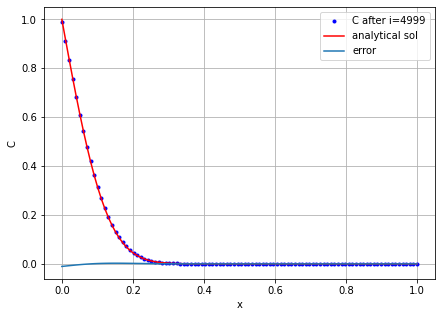

In [112]:
plottime = tmax-1

fig = plt.figure(figsize = (7,5))

plt.plot(space,C[plottime,:], 'b.',label="C after i="+str(plottime))
plt.plot(space,analytical_sol(tmax, points=xmax, n_max=tmax),"r-",label="analytical sol")

err = C[plottime,:] - analytical_sol(tmax, points=xmax, n_max=tmax)
plt.plot(space,err, label="error")


plt.legend()
plt.xlabel("x")
plt.ylabel("C")
plt.grid()
# plt.show()
plt.savefig('plots/error.pdf')

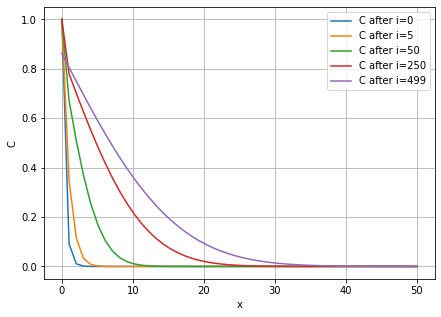

<Figure size 432x288 with 0 Axes>

In [75]:
plottimesteps = [0,round((tmax-1)*0.01),round((tmax-1)*0.1),round((tmax-1)*0.5),tmax-1]
fig = plt.figure(figsize = (7,5))
for i in plottimesteps:
    #plt.plot(space,C[i,:],label="C")
    plt.plot(space,C[i,:],label="C after i="+str(i))

plt.legend()
plt.xlabel("x")
plt.ylabel("C")
plt.grid()
plt.show()
# plt.savefig('plots/asdfasdfasdfasdf.pdf')